In [38]:
%load_ext autoreload
%autoreload 2
from infra.amazondatasetloader import AmazonReviewsDatasetLoader
from infra.svdpredictor import SVDRatingPredictor
from core.util import task

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
dataset = AmazonReviewsDatasetLoader().load_dataset()
train, test = dataset.split([0.8, 0.2])

 ⟍  Amazon review data load
   ⟍  Raw data loading
    |  Task is finished with an error: 
   ⟋  Raw data loading [+2520ms]
  |  Task is finished with an error: 
 ⟋  Amazon review data load [+2520ms]


KeyboardInterrupt: 

In [41]:
history = []
model_path = "model.npz"
predictor = SVDRatingPredictor(latent_dim=2)
# predictor.load(model_path)

 ⟍  Model initialization
  |  latent_dim : 2 [+0ms]
  |  gamma      : 0.01 [+0ms]
 ⟋  Model initialization [+0ms]


In [44]:
with task("Training"):
    for i in range(1000):
        with task("Epoch %d" % (i + 1)):
            try:
                predictor.train(train)
                train_mse = predictor.evaluate(train)
                valid_mse = predictor.evaluate(test)
                history.append((train_mse, valid_mse))
                task.log("Train MSE      : %.4f" % train_mse)
                task.log("Validation MSE : %.4f" % valid_mse)
                predictor.save(model_path)
            except KeyboardInterrupt:
                task.log("Training interrupted")
                break

 ⟍  Training
   ⟍  Epoch 1
    |  Train MSE      : 0.0006 [+46217ms]
    |  Validation MSE : 21.4095 [+0ms]
   ⟋  Epoch 1 [+46225ms]
   ⟍  Epoch 2
    |  Train MSE      : 0.0006 [+45335ms]
    |  Validation MSE : 21.4068 [+0ms]
   ⟋  Epoch 2 [+45343ms]
   ⟍  Epoch 3
    |  Train MSE      : 0.0006 [+46422ms]
    |  Validation MSE : 21.4040 [+0ms]
   ⟋  Epoch 3 [+46430ms]
   ⟍  Epoch 4
    |  Train MSE      : 0.0006 [+46479ms]
    |  Validation MSE : 21.4014 [+0ms]
   ⟋  Epoch 4 [+46487ms]
   ⟍  Epoch 5
    |  Train MSE      : 0.0006 [+46649ms]
    |  Validation MSE : 21.3987 [+0ms]
   ⟋  Epoch 5 [+46657ms]
   ⟍  Epoch 6
    |  Train MSE      : 0.0006 [+46445ms]
    |  Validation MSE : 21.3962 [+0ms]
   ⟋  Epoch 6 [+46453ms]
   ⟍  Epoch 7
    |  Train MSE      : 0.0006 [+46123ms]
    |  Validation MSE : 21.3936 [+0ms]
   ⟋  Epoch 7 [+46131ms]
   ⟍  Epoch 8
    |  Train MSE      : 0.0006 [+45625ms]
    |  Validation MSE : 21.3911 [+0ms]
   ⟋  Epoch 8 [+45633ms]
   ⟍  Epoch 9
    |  Traini

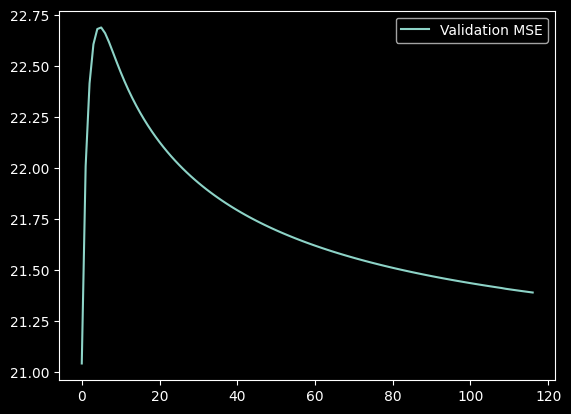

user 0: [0.15456836 0.68586513]
item 0: [-0.16134644  1.38518395]
dot product: 0.9251103229725989

user 1: [1.33243665 1.76850494]
item 1: [ 0.20110787 -0.18821606]
dot product: -0.0648975228281522

user 2: [ 1.36027382 -1.76181063]
item 2: [-0.03324676  0.89606815]
dot product: -1.6239270913938684

user 3: [0.11708949 1.28907331]
item 3: [-2.23629267  0.28673697]
dot product: 0.10777862079007539

user 4: [0.3382232  0.70175374]
item 4: [-0.24647163  2.28047709]
dot product: 1.516970912490675

user 5: [-0.48436748 -2.10791174]
item 5: [-0.83152398  0.49098836]
dot product: -0.63219694928356

user 6: [0.19938915 0.7303063 ]
item 6: [0.26677972 0.94827322]
dot product: 0.745722887651876

user 7: [1.98399939 0.49794596]
item 7: [-2.11626572  0.81097676]
dot product: -3.7948472985840658

user 8: [-0.22065396  0.28307228]
item 8: [ 0.73262742 -0.72836366]
dot product: -0.367836700543114

user 9: [-1.4611992   0.99325503]
item 9: [-1.88751863 -1.21108629]
dot product: 1.5551231563701362



In [46]:
import matplotlib.pyplot as plt

train_mse, valid_mse = zip(*history)
plt.plot(valid_mse, label="Validation MSE")
plt.legend()
plt.show()

predictor.explain()